### Exploratory Data Analysis Portfolio Project

- To qualify this Project you must meet following criteria
    - 10 charts (minimum)
    - 1 to 3 charts must be interactive
    - What you see in that chart? Results
    - Data Preprocessing 
        - Missing values
        - duplicates values 
        - Outliers - (identify the outliers)
        - Handle outliers 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/inventor/Datasets/Formula 1/formula_1/results.csv")

In [3]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
df.shape

(26759, 18)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

In [6]:
# Discription about the dataset
df.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000
mean,13380.977391,551.687283,278.673530,50.180537,11.134796,12.794051,1.987632,46.301768,17.224971
std,7726.134642,313.265036,282.703039,61.551498,7.202860,7.665951,4.351209,29.496557,26.026104
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6690.500000,300.000000,57.000000,6.000000,5.000000,6.000000,0.000000,23.000000,1.000000
50%,13380.000000,531.000000,172.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,20069.500000,811.000000,399.500000,63.000000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26764.000000,1144.000000,862.000000,215.000000,34.000000,39.000000,50.000000,200.000000,141.000000


In [7]:
# Value counts of the "Objext" features
def explore_value_counts(df, feature_name):

    if df[feature_name].dtype == "object":
        value_counts = df[feature_name].value_counts()
        print(f"Value Counts for {feature_name}:\n {value_counts}\n")

In [8]:
explore_value_counts(df, "number")

Value Counts for number:
 number
4     1019
16    1005
11    1001
3      994
6      994
      ... 
84       1
78       1
86       1
85       1
79       1
Name: count, Length: 130, dtype: int64



In [9]:
for feature in df.columns:

    if df[feature].dtype == "object":
        explore_value_counts(df, feature)

Value Counts for number:
 number
4     1019
16    1005
11    1001
3      994
6      994
      ... 
84       1
78       1
86       1
85       1
79       1
Name: count, Length: 130, dtype: int64

Value Counts for position:
 position
\N    10953
3      1135
4      1135
2      1133
5      1131
1      1128
6      1124
7      1104
8      1076
9      1038
10      978
11      901
12      800
13      713
14      605
15      528
16      432
17      336
18      223
19      141
20       72
21       34
22       19
23        8
24        3
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
Name: count, dtype: int64



Value Counts for positionText:
 positionText
R     8897
F     1368
3     1135
4     1135
2     1133
5     1131
1     1128
6     1124
7     1104
8     1076
9     1038
10     978
11     902
12     800
13     713
14     606
15     528
16     432
17     336
W      336
18     223
N      190
D      151
19     141
20      72
21      34
22      19
E        9
23       8
24       3
25       1
26       1
27       1
28       1
29       1
30       1
31       1
32       1
33       1
Name: count, dtype: int64

Value Counts for time:
 time
\N             19079
+8:22.19           5
+46.2              4
+1:29.6            4
+5.7               4
               ...  
+40.514            1
1:42:34.492        1
+1:28.536          1
+43.130            1
+1:06.125          1
Name: count, Length: 7411, dtype: int64

Value Counts for milliseconds:
 milliseconds
\N          19079
14259460        5
10928200        3
4988777         2
14260930        2
            ...  
5471951         1
5827095         1
5813679  

In [10]:
# Missing value in the dataset
df.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [11]:
# Duplicate value int he dataset
df.duplicated().sum()

np.int64(0)

In [12]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [13]:
# Replace the datatypes of the columns
df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [14]:
df["position"].value_counts(), df["positionText"].value_counts(), df["positionOrder"].value_counts()

(position
 \N    10953
 3      1135
 4      1135
 2      1133
 5      1131
 1      1128
 6      1124
 7      1104
 8      1076
 9      1038
 10      978
 11      901
 12      800
 13      713
 14      605
 15      528
 16      432
 17      336
 18      223
 19      141
 20       72
 21       34
 22       19
 23        8
 24        3
 25        1
 26        1
 27        1
 28        1
 29        1
 30        1
 31        1
 32        1
 33        1
 Name: count, dtype: int64,
 positionText
 R     8897
 F     1368
 3     1135
 4     1135
 2     1133
 5     1131
 1     1128
 6     1124
 7     1104
 8     1076
 9     1038
 10     978
 11     902
 12     800
 13     713
 14     606
 15     528
 16     432
 17     336
 W      336
 18     223
 N      190
 D      151
 19     141
 20      72
 21      34
 22      19
 E        9
 23       8
 24       3
 25       1
 26       1
 27       1
 28       1
 29       1
 30       1
 31       1
 32       1
 33       1
 Name: count, dtype: int64,
 positionO

In [15]:
df["position"] = df["position"].replace(r'\\N', 0, regex=True)
df['fastestLapTime'] = df["fastestLapTime"].replace(r'\\N', "00:00.0", regex=True)
df["fastestLapSpeed"] = df["fastestLapSpeed"].replace(r'\\N', 0.0, regex=True)
df["fastestLap"] = df["fastestLap"].replace(r'\\N', 0, regex=True)
df["rank"] = df["rank"].replace(r'\\N', 0, regex=True)

In [16]:

df["rank"].value_counts()

rank
0     18249
2       410
5       410
1       410
4       410
3       410
6       410
8       409
9       409
7       409
10      409
11      409
13      408
14      408
12      408
15      407
16      406
17      400
18      390
19      348
20      288
0       258
21      122
22       91
23       43
24       28
Name: count, dtype: int64

In [17]:
# Replace the columns 
# Number
# fastspeed
# fasttimelap
# rank
df["number"] = df["number"].replace(r'\\N', 0, regex=True)
df["number"] = df["number"].astype(int)
df["position"] = df["position"].astype(int)
df["fastestLapTime"] = pd.to_datetime(df["fastestLapTime"], format="%M:%S.%f")
df["fastestLapSpeed"] = df["fastestLapSpeed"].astype(float)
df["fastestLap"] = df['fastestLap'].astype(int)
df["rank"] = df["rank"].astype(int)

In [18]:
df["lapminutes"] = df["fastestLapTime"].dt.minute
df["lapseconds"] = df["fastestLapTime"].dt.second

In [19]:
df = df.drop(["fastestLapTime", "resultId"], axis=1)

### Data Visulization

In [20]:
df.columns

Index(['raceId', 'driverId', 'constructorId', 'number', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapSpeed', 'statusId',
       'lapminutes', 'lapseconds'],
      dtype='object')

<Axes: ylabel='Density'>

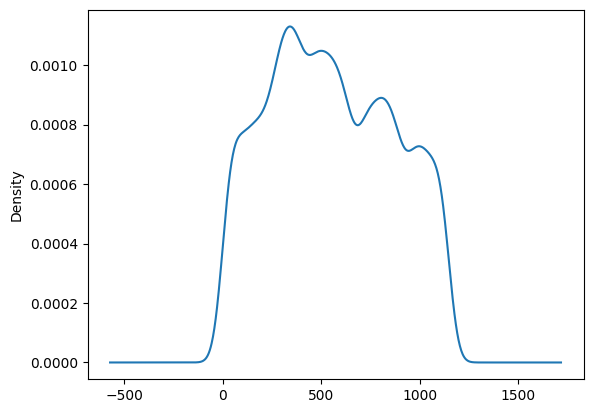

In [21]:
# How much races occured

df["raceId"].plot(kind="kde")

In [22]:
# Driver perfomance 

driver_df = pd.read_csv("/home/inventor/Datasets/Formula 1/formula_1/drivers.csv")

In [23]:
driver_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


<Axes: xlabel='forename'>

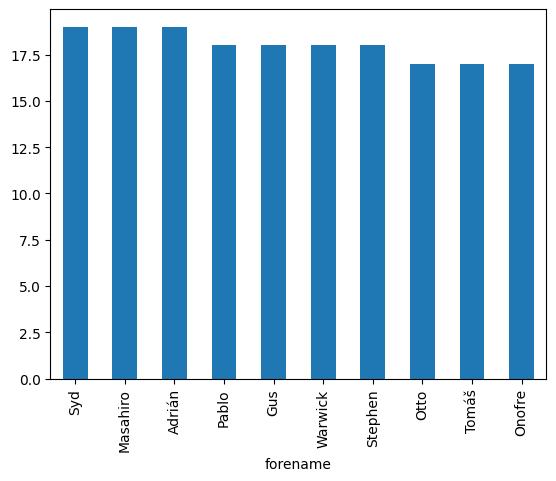

In [24]:
# Driver by position
df.groupby(driver_df["forename"])["position"].mean().sort_values(ascending=False).head(10).plot(kind="bar")

<Axes: xlabel='forename'>

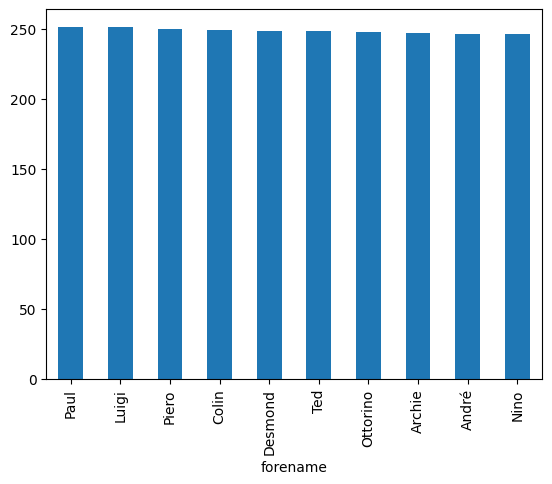

In [25]:
df.groupby(driver_df["forename"])["fastestLapSpeed"].max().sort_values(ascending=False).head(10).plot(kind="bar")

In [26]:
top_speed = df.groupby("driverId")["fastestLapSpeed"].max().reset_index()

In [27]:
top_speed

,driverId,fastestLapSpeed
0,1,255.849
1,2,250.375
2,3,246.884
3,4,253.874
4,5,247.605
...,...,...
856,858,240.152
857,859,242.944
858,860,241.103
859,861,249.077


In [28]:
top_10 = top_speed.sort_values(by="fastestLapSpeed", ascending=False).head(10)

In [29]:
top_10

,driverId,fastestLapSpeed
21,22,257.320
29,30,256.324
844,846,256.100
7,8,255.874
0,1,255.849
828,830,255.120
30,31,254.861
855,857,254.503
845,847,254.215
3,4,253.874


In [30]:
top_10 = top_10.merge(driver_df, on="driverId")

In [31]:
top_10

,driverId,fastestLapSpeed,driverRef,number,code,forename,surname,dob,nationality,url
0,22,257.320,barrichello,\N,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
1,30,256.324,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
2,846,256.100,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
3,8,255.874,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
4,1,255.849,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
5,830,255.120,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen
6,31,254.861,montoya,\N,MON,Juan,Pablo Montoya,1975-09-20,Colombian,http://en.wikipedia.org/wiki/Juan_Pablo_Montoya
7,857,254.503,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
8,847,254.215,russell,63,RUS,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_(r...
9,4,253.874,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso


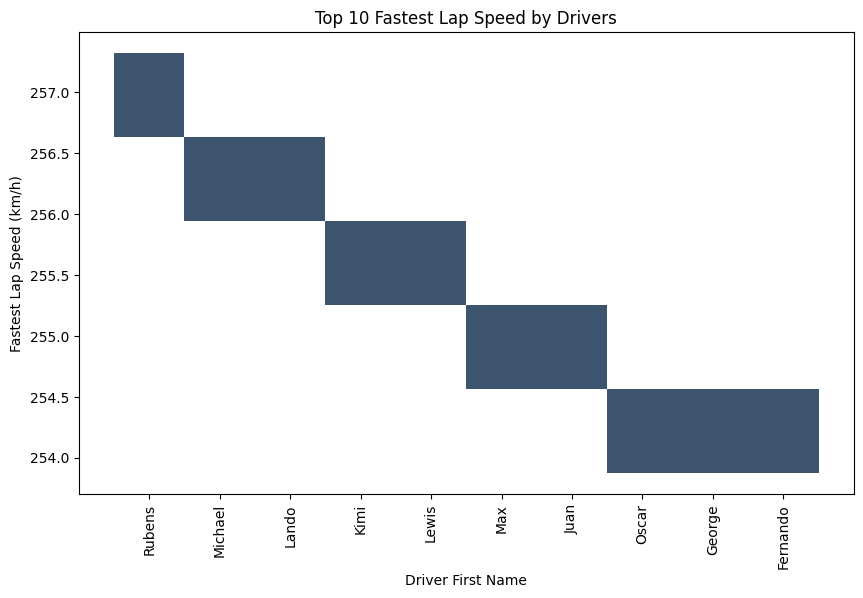

In [32]:
# Fastest spped by drivers
plt.figure(figsize=(10, 6))
sns.histplot(x=top_10["forename"], y=top_10["fastestLapSpeed"])
plt.xticks(rotation=90)
plt.title("Top 10 Fastest Lap Speed by Drivers")
plt.xlabel("Driver First Name")
plt.ylabel("Fastest Lap Speed (km/h)")
plt.show()

In [33]:
indices_to_drop_ = df[df["rank"] == 0].index
df["rank"] = df["rank"].drop(indices_to_drop_)

In [34]:
# Rank of drivers
top_rank = df.groupby("driverId")["rank"].max().reset_index()

In [35]:
top_rank_driver = top_rank.sort_values(by="rank", ascending=True).head(10)

In [36]:
top_rank_driver

,driverId,rank
47,48,7.0
858,860,13.0
860,862,13.0
42,43,15.0
849,851,15.0
40,41,16.0
848,850,17.0
27,28,17.0
857,859,17.0
68,69,18.0


In [37]:
top_rank_driver = top_rank_driver.merge(driver_df, on="driverId")

In [38]:
df["rank"].value_counts()

rank
2.0     410
3.0     410
5.0     410
1.0     410
4.0     410
6.0     410
8.0     409
7.0     409
11.0    409
9.0     409
10.0    409
14.0    408
13.0    408
12.0    408
15.0    407
16.0    406
17.0    400
18.0    390
19.0    348
20.0    288
21.0    122
22.0     91
23.0     43
24.0     28
Name: count, dtype: int64

In [39]:
top_rank_driver

,driverId,rank,driverRef,number,code,forename,surname,dob,nationality,url
0,48,7.0,gene,\N,\N,Marc,Gené,1974-03-29,Spanish,http://en.wikipedia.org/wiki/Marc_Gen%C3%A9
1,860,13.0,bearman,38,BEA,Oliver,Bearman,2005-05-08,British,http://en.wikipedia.org/wiki/Oliver_Bearman
2,862,13.0,doohan,61,DOO,Jack,Doohan,2003-01-20,Australian,http://en.wikipedia.org/wiki/Jack_Doohan
3,43,15.0,matta,\N,\N,Cristiano,da Matta,1973-09-19,Brazilian,http://en.wikipedia.org/wiki/Cristiano_da_Matta
4,851,15.0,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
5,41,16.0,zonta,\N,ZON,Ricardo,Zonta,1976-03-23,Brazilian,http://en.wikipedia.org/wiki/Ricardo_Zonta
6,850,17.0,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
7,28,17.0,markus_winkelhock,\N,WIN,Markus,Winkelhock,1980-06-13,German,http://en.wikipedia.org/wiki/Markus_Winkelhock
8,859,17.0,lawson,30,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson
9,69,18.0,badoer,\N,BAD,Luca,Badoer,1971-01-25,Italian,http://en.wikipedia.org/wiki/Luca_Badoer


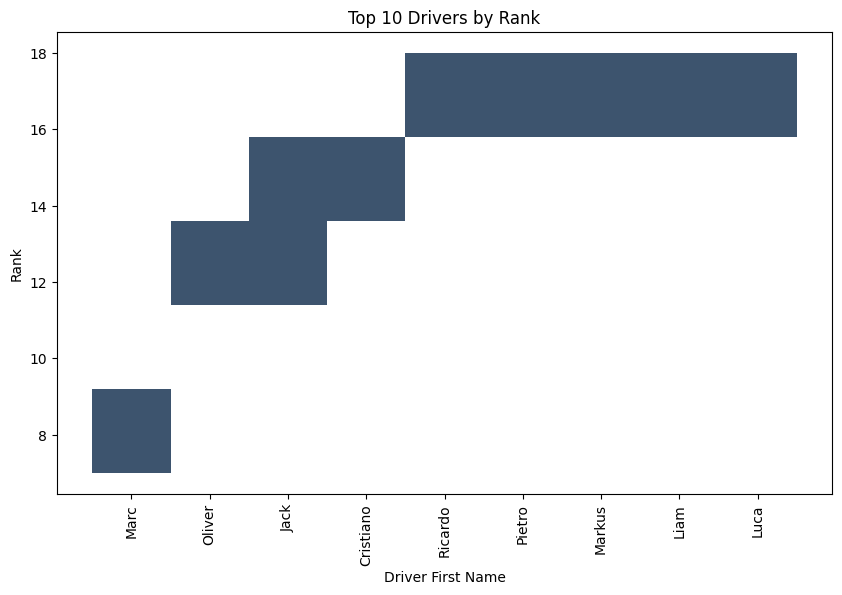

In [40]:
plt.figure(figsize=(10, 6))

sns.histplot(x=top_rank_driver["forename"], y=top_rank_driver["rank"])
plt.xticks(rotation=90)
plt.xlabel("Driver First Name")
plt.ylabel("Rank")
plt.title("Top 10 Drivers by Rank")
plt.show()

In [41]:
df.columns

Index(['raceId', 'driverId', 'constructorId', 'number', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapSpeed', 'statusId',
       'lapminutes', 'lapseconds'],
      dtype='object')

In [42]:
sns.set_theme("paper")

<Figure size 1000x600 with 0 Axes>

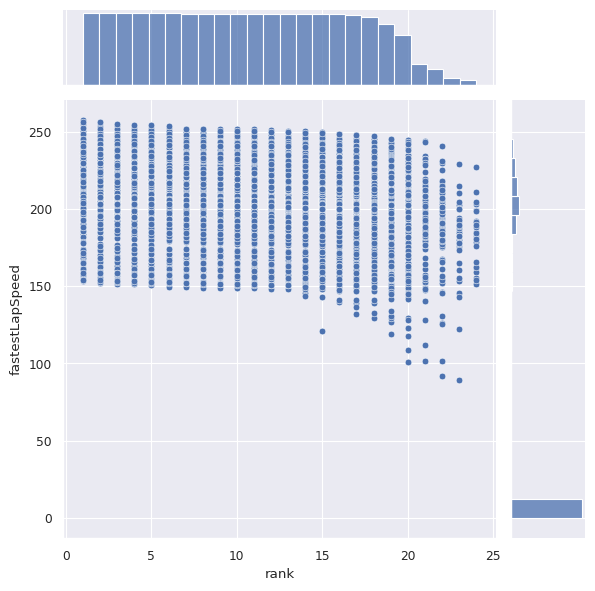

In [43]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=df["rank"], y=df["fastestLapSpeed"])

<Figure size 1000x600 with 0 Axes>

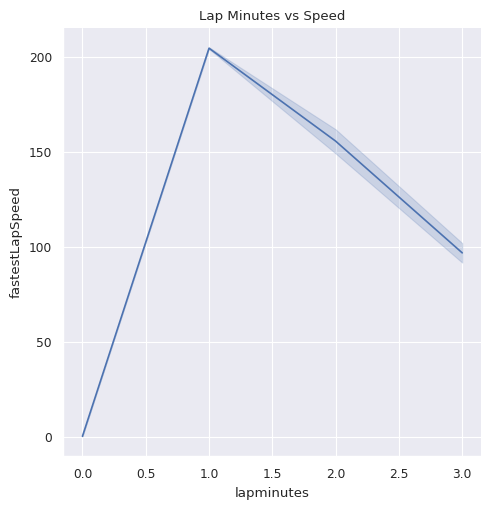

In [44]:
# Relationship between lap minutes and speed
plt.figure(figsize=(10, 6))
sns.relplot(x=df["lapminutes"], y=df["fastestLapSpeed"], kind="line")
plt.title("Lap Minutes vs Speed")
plt.show()

<Figure size 1000x600 with 0 Axes>

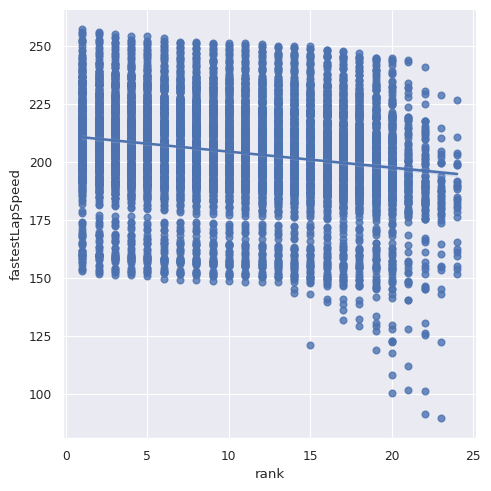

In [45]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x="rank", y="fastestLapSpeed")

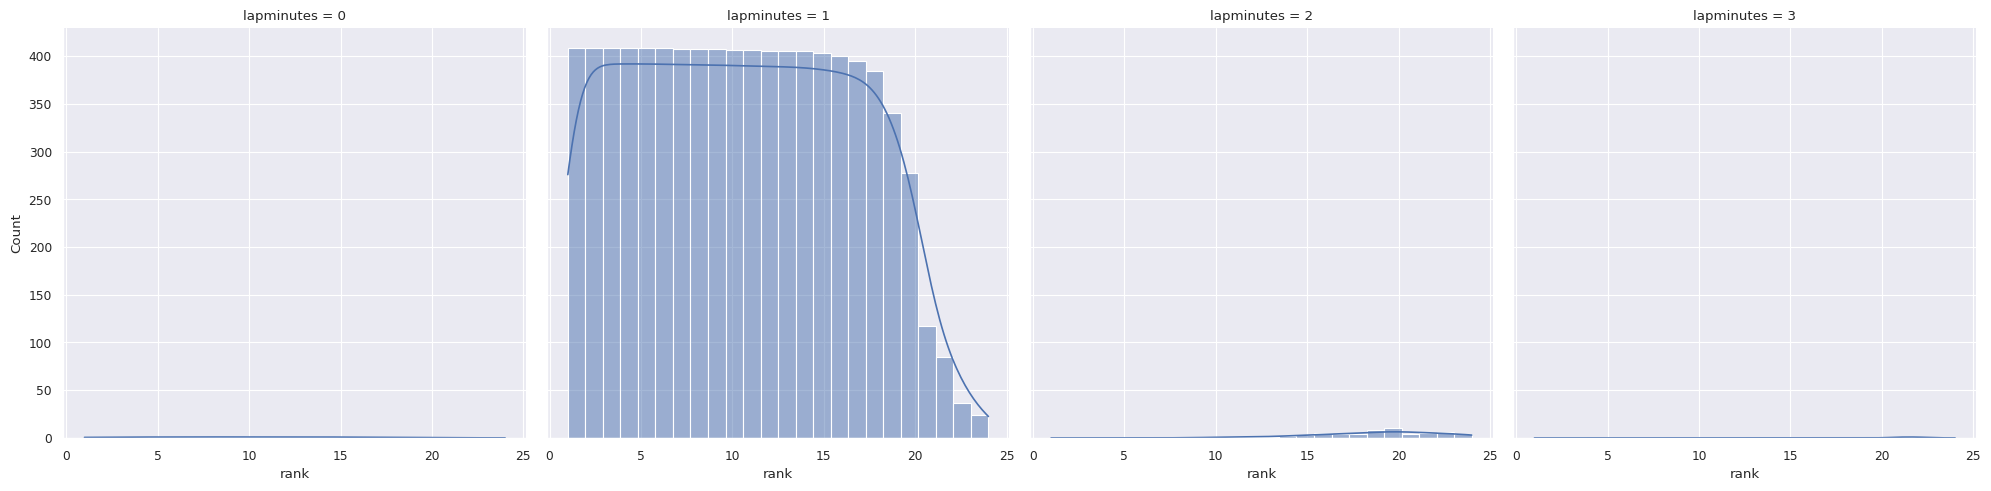

In [46]:
sns.displot(data=df, x="rank", col="lapminutes", kde=True)